## Class 1 - Formulating a modeling problem
In our first lecture, we discussed a few overarching points related to this course. Let's do a quick recap:
- The core of this course will be devoted to exploring ways in which we can extract knowledge from data;
- This relies on the fact that we need to be able to "ask questions" to our data;
- Most of these questions will revolve around learning a mathematical or algorithmic model of relations between some features and an outcome, or, when no outcome is available, learning "structures" within our feature space;
- We can do so for two (not mutually exclusive) reasons: to be able to infer the outcome from the features we can observe or to understand how and why inputs and outcomes are related;
- Here, we will mostly focus on developing models which are **good at inferring outcomes from features** in new data.


We emphasized that an important skill for a data scientist is that of being able to identify **questions** that can be answered with data. Let's start getting our hands dirty with this in this first class. Today, the focus will be formulating an interesting predictive questions based on a dataset of your own choice.

In [ ]:
!pip install matplotlib pandas scikit-learn seaborn

### Structure of today's exercise
For this class, your goal is to perform the following tasks:
1. Together with your group, choose one of these datasets (or find a new one)
    - HippoCorpus (a dataset of recalled or imagined stories, paired with a number of story- and participant-related metadata: https://www.kaggle.com/datasets/saurabhshahane/hippocorpus)
    - EEG Psychiatric Disorders Dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset?resource=download (from this paper: https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.707581/full)
    - Personalities and random number choices from OpenPsychometrics: https://openpsychometrics.org/_rawdata/ (search for "random numbers")
    - A large-scale data set containing data from a bike-sharing service and weather information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset.



2. Load the corresponding data, which you will find under `Project Files/data` using `pandas`


In [11]:
import pandas as pd

data = pd.read_csv("/work/Project Files/data/class_01/bikes.csv")


3. Using `pandas` and `seaborn`, get a grasp of the overall characteristics of the dataset:
    - What is the size of your dataset, and how many features are available? 
        - Hint: Use `DataFrame.shape` from `pandas`



In [12]:
data.shape

(17379, 17)

In [13]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- What kind of information do the columns include?
    - Hint: Read the dataset's documentation + associated papers. Methods like `.info()` or `.describe()` could also be useful.

In [14]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- What *types* of variables does each of the column contain? What kind of values do we expect to find in each column?
    - Hint: to extract this information analytically, look into `pandas` `dtype`, `unique`, and `min`/`max` functions
    - To plot this information, use `seaborn` functions (`displot`, `pointplot`, `catplot` or `boxplot` could be helpful)
        


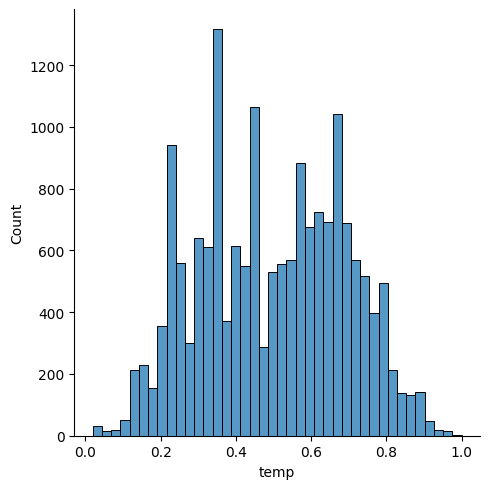

In [19]:
import seaborn as sns

sns.displot(data=data, x = "temp")


- What is the proportion of missing values for each column? Is there any column with a worryingly high proportion of missing values?
    - Hint: use the `.isnull()` method and aggregate over rows using `.sum()`

In [23]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- What is the proportion of missing values for each row? Is there any row with a worryingly high proportion of missing values?
    - Hint: very similar to what you did above
        


- Is there any very apparent structure in your data, e.g., clusters of highly correlated features? 
    - Hint: use pandas `.corr()` and seaborn `clustermap` to look into that: https://seaborn.pydata.org/generated/seaborn.clustermap.html


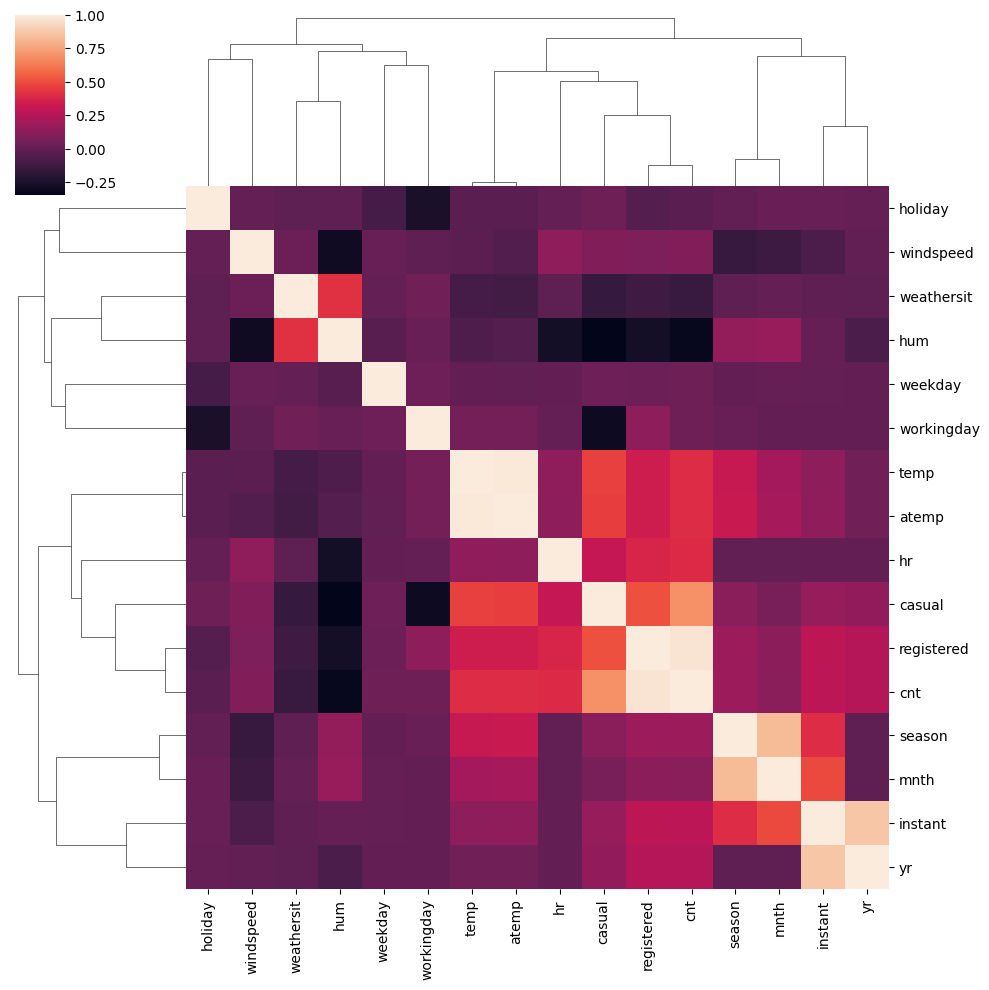

In [29]:
corr_map = data.corr(numeric_only=True)

sns.clustermap(corr_map)

In [30]:
corr_map

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772



4. Think about what information the dataset contains, and formulate one of the following:
    - A prediction question that can be addressed in terms of predictive performance in a regression task;
    - A prediction question that can be addressed in terms of predictive performance in a classification task


**Regression task:** Can the proportion of casual vs registered users be predicted from weather data?

In [31]:
data["prop_users"] = data["casual"] / data["registered"]

In [34]:
# checking that we did not induce any nans due to zero division
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
prop_users    0
dtype: int64


5. For the regression OR classification task you have formulated, answer the following questions:
- What kind of metric can you use to assess whether the model predicts successfully?
    - Since it is a regression we could use mean squared error or mean absolute error.
- What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
    - Take the mean proportion of casual and registered users. Calculate the mean squared error of that (variance).
- What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
    - 
- Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
    - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots (e.g., visualizing relations between variables)

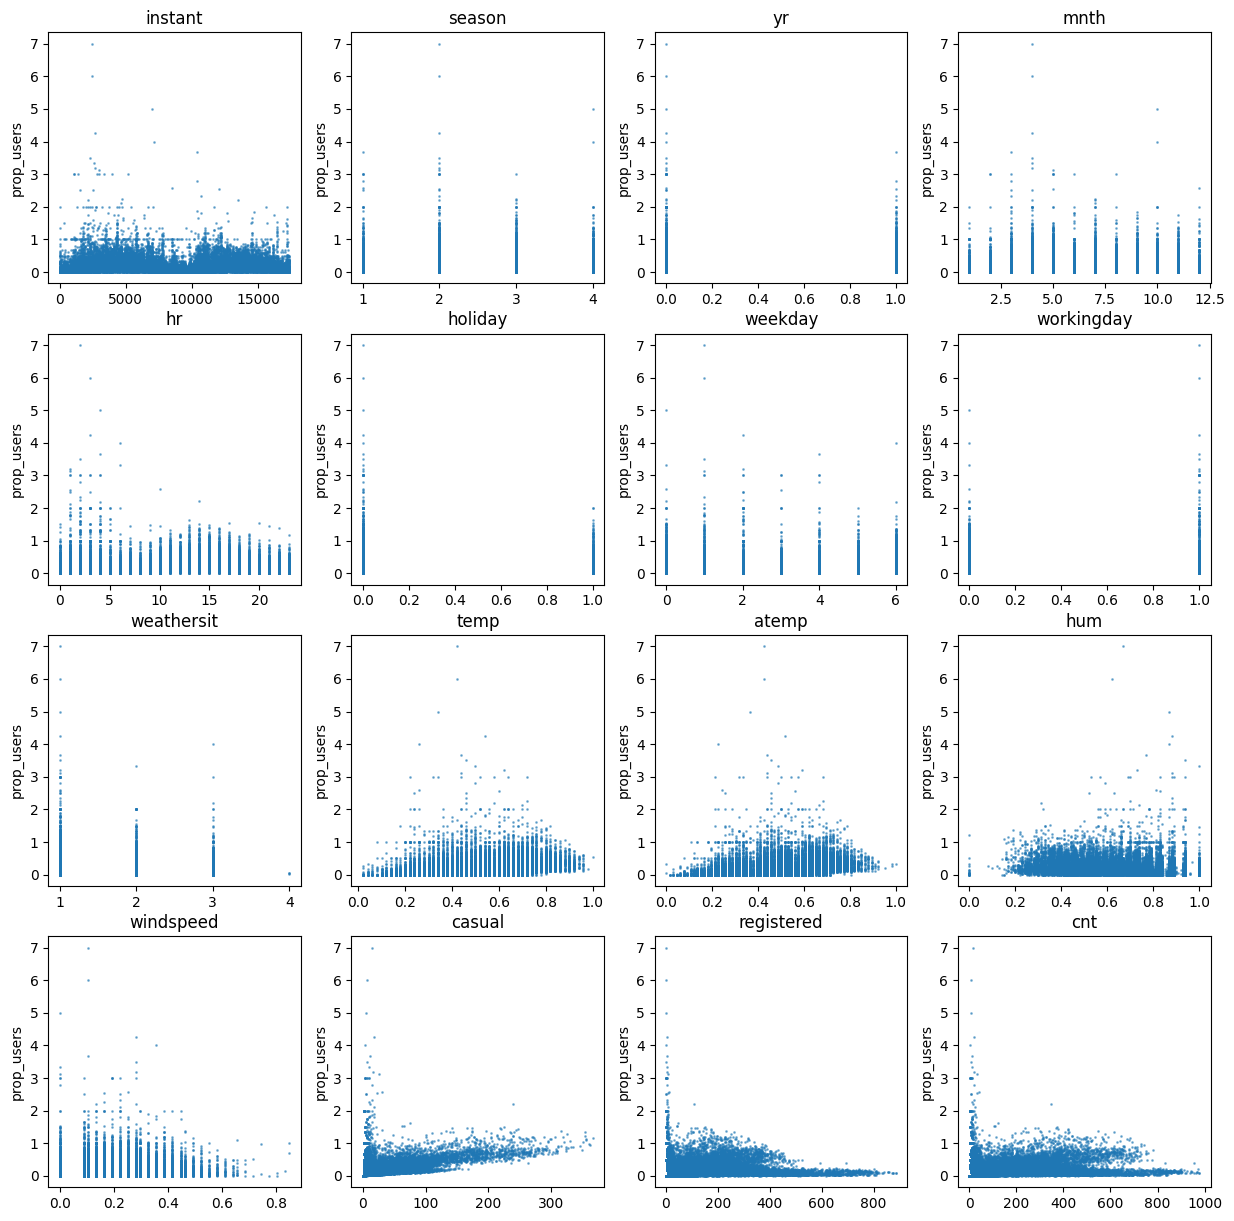

In [45]:
import matplotlib.pyplot as plt


# only keep numeric columns
data_num = data.select_dtypes(include=["int64", "float64"])

fig, ax = plt.subplots(4, data_num.shape[1]//4, figsize=(15, 15))

# plot correlation of each variable with prop_users
for col, ax in zip(data_num.columns, ax.flatten()):
    if col != "prop_users":
        ax.scatter(data[col], data["prop_users"], alpha=0.5, s=1)
        ax.set_title(col)
        ax.set_ylabel("prop_users")

plt.show()


### Once you have done this
1. Share your answers to 4 and 5 on the Brightspace Padlet
2. Keep your notebooks, I will ask you to briefly run us through them!
3. Next week, we will select a subset of your questions, and work on them for the first few weeks